# A Simple Autoencoder for PCA

[Prashant Brahmbhatt](www.github.com/hashbanger)

____

### Importing

In [0]:
import numpy as np
import matplotlib.pyplot as plt

First we create a made up dataset of three dimension ad reduce it tot two dimensions.

In [0]:
from sklearn.datasets import make_blobs

In [0]:
data = make_blobs(n_samples= 100, n_features= 3, centers= 2, random_state = 101)

In [4]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

## Scaling the Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
train_full = scaler.fit_transform(data[0])

In [0]:
x_feat = train_full[:, 0]
y_feat = train_full[:, 1]
z_feat = train_full[:, 2]

In [0]:
from mpl_toolkits.mplot3d import Axes3D

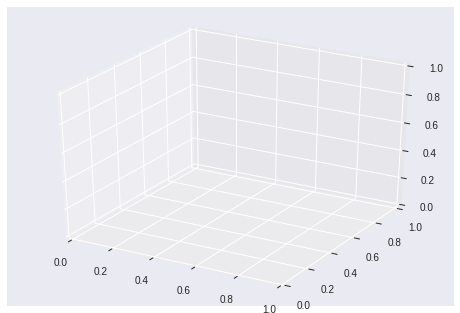

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

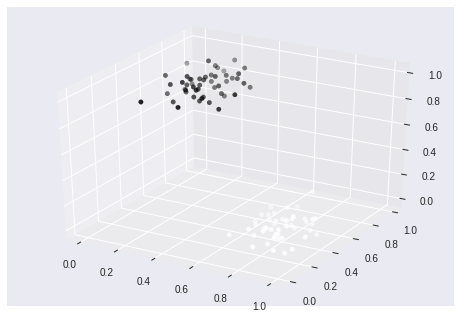

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_feat, y_feat, z_feat, c = data[1])

## The Linear Autoencoder

In [0]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [0]:
num_inputs = 3 # three dimensional input
num_hidden = 2 # two dimensional representation
num_outputs = num_inputs

learning_rate = 0.01 

### Placeholder 

In [0]:
X = tf.placeholder(tf.float32, shape = [None, num_inputs])

### Layers

We do not provide any activation function using the layers API

In [0]:
hidden = fully_connected(X, num_hidden, activation_fn = None)
outputs = fully_connected(hidden, num_outputs, activation_fn = None )

### Loss Function

In [0]:
loss = tf.reduce_mean(tf.square(outputs - X)) # Mean Squared Error

### Optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

### Init

In [0]:
init  = tf.global_variables_initializer()

### Session

In [0]:
num_steps = 1000
with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train, feed_dict = {X: train_full})
        
    # Now asking for the hidden layer output
    output_2d = hidden.eval(feed_dict = {X: train_full})

In [23]:
output_2d.shape

(100, 2)

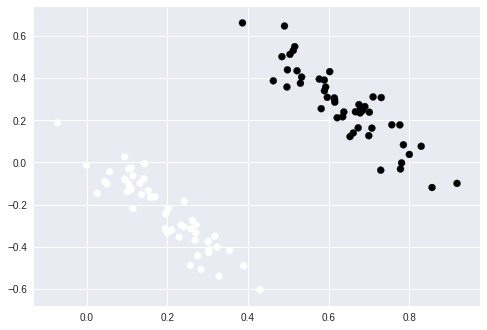

In [24]:
plt.scatter(output_2d[:, 0], output_2d[:, 1], c = data[1])

So we have successfully reduced the dimensions from three to two.

### de nada!